In [2]:
import numpy as np
import pandas as pd
import xarray as xr

import os

import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [3]:
DATA_DIR = '/g/data/w40/ab2313/rainfall_2020/mjo_index'

In [4]:
os.listdir(DATA_DIR)

['mjo_daily_clim_1981_2010_1979-2022_detrended.nc',
 'mjo_monthly_anoms_clim_1981_2010_1979-2022.nc',
 'rmm.74toRealtime.txt',
 'mjo_monthly_clim_1981_2010_1979-2022_detrended.nc',
 'mjo_daily_clim_1981_2010_1979-2022.nc',
 '.ipynb_checkpoints',
 'mjo_monthly_anoms_clim_1981_2010_1979-2022_detrended.nc',
 'mjo_monthly_clim_1981_2010_1979-2022.nc']

In [6]:
rmm_raw_ds = xr.open_dataset(os.path.join(DATA_DIR, 'mjo_daily_clim_1981_2010_1979-2022.nc')); rmm_raw_ds

<xarray.Dataset>
Dimensions:    (time: 16040)
Coordinates:
    dayofyear  (time) int64 ...
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2022-11-30
Data variables:
    phase      (time) float64 ...
    amplitude  (time) float64 ...
    phase_ID   (time) int64 ...

In [7]:
mean = rmm_raw_ds.amplitude.mean().values
std = rmm_raw_ds.amplitude.std().values
bound = mean-std
bound

217801725.39620945

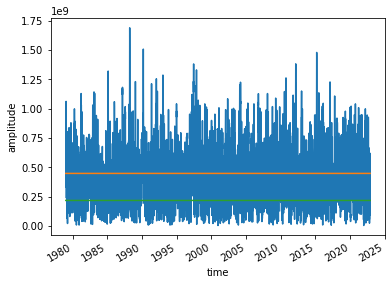

In [8]:
rmm_raw_ds.amplitude.plot()
plt.plot(rmm_raw_ds.time.values, np.tile(mean, len(rmm_raw_ds.time.values)))
plt.plot(rmm_raw_ds.time.values, np.tile(bound, len(rmm_raw_ds.time.values)))


In [11]:
rmm1_raw_ds = rmm_raw_ds.amplitude * np.cos(rmm_raw_ds.phase)
rmm2_raw_ds = rmm_raw_ds.amplitude * np.sin(rmm_raw_ds.phase)

In [12]:
xr.concat([rmm2_raw_ds, rmm2_raw_ds], pd.Index(['rmm1', ']))

<xarray.DataArray (time: 16040)>
array([ 2.85878549e+08,  3.51726716e+08,  4.80938807e+08, ...,
        2.11133338e+08,  4.54747964e+07, -8.45303519e+07])
Coordinates:
    dayofyear  (time) int64 1 2 3 4 5 6 7 8 ... 327 328 329 330 331 332 333 334
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2022-11-30

In [250]:
rmm_list_ds = rmm_raw_ds.sel(time=slice('2022-02-14T00:00:00.000000000', '2022-03-10T00:00:00.000000000'))

In [226]:
days = rmm_ds.time.dt.day.values

rmm1_ds = rmm_ds.amplitude * np.cos(rmm_ds.phase)
rmm2_ds = rmm_ds.amplitude * np.sin(rmm_ds.phase)

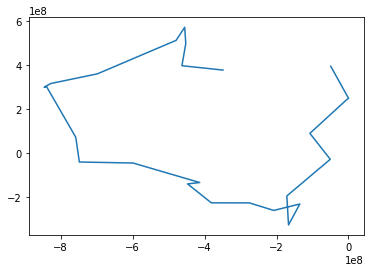

In [227]:
itime = 50
plt.plot(rmm1_ds.values, rmm2_ds.values)

In [228]:
scale = 1e9

In [235]:
rmm1_ds = rmm1_ds/scale
rmm2_ds = rmm2_ds/scale

In [236]:
event_slice = slice('2022-02-24T00:00:00.000000000', '2022-03-01T00:00:00.000000000')

In [237]:
interp_time = pd.date_range(start=rmm1_ds.time.values[0], end=rmm1_ds.time.values[-1], periods=len(rmm1_ds.time.values)*2)

rmm1_ds_interp = rmm1_ds.interp(time=interp_time, method='quadratic')
rmm2_ds_interp = rmm2_ds.interp(time=interp_time, method='quadratic')

In [306]:
def add_rmm_features(fig, ax):
    scale = 1e9
    lim = 1.5
    ax.set_xlim(-lim,lim)
    ax.set_ylim(-lim,lim)
    # ax.grid(linestyle=":")
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    ax.yaxis.set_minor_locator(MultipleLocator(0.5))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

    ax.plot([-lim,lim],[-lim,lim], color='.8', ls='--', alpha=.5)
    ax.plot([lim, -lim],[-lim,lim], color='.8', ls='--', alpha=.5)
    ax.axhline(0, color='.8', ls='--', alpha=.5)
    ax.axvline(0, color='.8', ls='--', alpha=.5)
    circ = plt.Circle((0, 0), radius=bound/scale, edgecolor='0.8', facecolor='w', zorder=2)
    ax.add_patch(circ)
    ax.set_ylabel('PC1', fontsize=18.)
    ax.set_xlabel('PC2', fontsize=18.)

    shift = .15
    phases = ((-lim-shift, -1, '1'), (-1, -lim-shift, '2'), (1, -lim-shift, '3'), (lim+shift, -1, '4'),
                  (-lim-shift,  1, '8'), (-1,  lim+shift, '7'), (1,  lim+shift, '6'), (lim+shift,  1, '5'))
    for p in phases: ax.text(*p, fontsize=18., va='center_baseline', ha='center')
    # 
    ax.text(lim-shift, 0,  'Maritime\nContinent', fontsize=18, ha='center', va='center', rotation=-90)
    ax.text(-lim+shift, 0,'West. Hem\nand Africa', fontsize=18, ha='center', va='center', rotation=90)
    ax.text(0, lim-shift,'Western\nPacific', fontsize=18, ha='center', va='center')
    ax.text(0, -lim+shift,'Indian\nOcean'  , fontsize=18, ha='center', va='center')

In [307]:
start = 'Feb-' + str(rmm1_ds_interp.time.dt.day.values[0])
end = 'March-' + str(rmm1_ds_interp.time.dt.day.values[-1])
first_flood = 'Feb-' + str(rmm1_ds.sel(time=event_slice).time.dt.day.values[0])
end_flood = 'March-' + str(rmm1_ds.sel(time=event_slice).time.dt.day.values[-1])

print(f'{first_flood=}, {end_flood=}')

first_flood='Feb-24', end_flood='March-1'


Text(1.01, 0.01, '1e9')

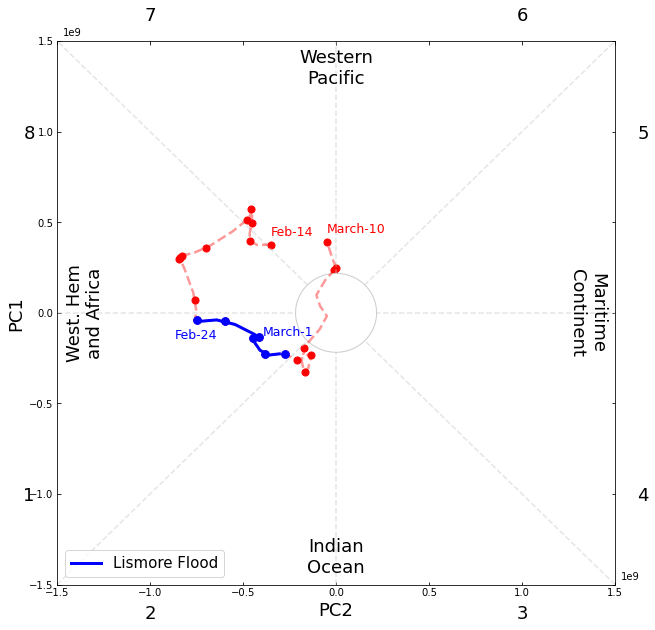

In [308]:
fig, ax = plt.subplots(figsize=(10,10))

add_rmm_features(fig, ax)

ax.plot(rmm1_ds_interp.values, rmm2_ds_interp.values, color='red', linewidth=2.5, linestyle='--', alpha=0.4)
ax.scatter(rmm1_ds.values, rmm2_ds.values, facecolor='red', s=50)

ax.plot(rmm1_ds_interp.sel(time=event_slice).values, rmm2_ds_interp.sel(time=event_slice).values, color='blue',
        linewidth=3, label='Lismore Flood')
ax.scatter(rmm1_ds.sel(time=event_slice).values, rmm2_ds.sel(time=event_slice).values, facecolor='blue', s=60, zorder=5)

ax.annotate(start, xy=(rmm1_ds_interp.values[0], rmm2_ds_interp.values[0]+.05), color='red', size=12.5);
ax.annotate(end, xy=(rmm1_ds_interp.values[-1], rmm2_ds_interp.values[-1]+.05), color='red', size=12.5);
ax.annotate(first_flood, xy=((rmm1_ds.sel(time=event_slice).values[0]-.12, rmm2_ds.sel(time=event_slice).values[0]-.1)),
            color='blue', size=12.5)

ax.annotate(end_flood, xy=((rmm1_ds.sel(time=event_slice).values[-1]-.12, rmm2_ds.sel(time=event_slice).values[-1]+.1)),
            color='blue', size=12.5)

ax.legend(fontsize=15, loc='lower left')

ax.annotate('1e9', xy=(0.01, 1.01), xycoords='axes fraction')
ax.annotate('1e9', xy=(1.01, .01), xycoords='axes fraction')